In [1]:
#Titanic ML-Logistic Regresion/RF/SVM

In [2]:
#Import libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#read csv file
df = pd.read_csv('Titanic_Train.csv')
df_test = pd.read_csv('Titanic_Test.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()
#there's missing data for age and cabin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


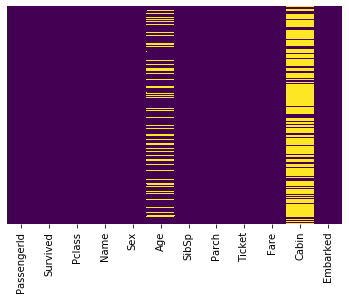

In [5]:
#EDA
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

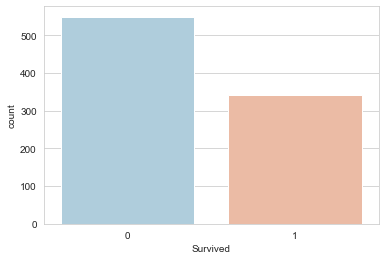

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df,palette='RdBu_r')
#unbalanced data 

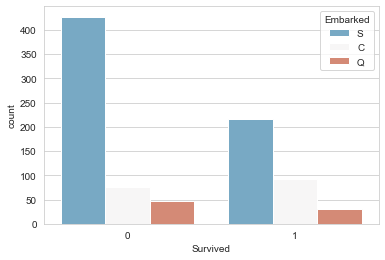

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df,hue='Embarked',palette='RdBu_r')
#C has more surviving rate than the other two

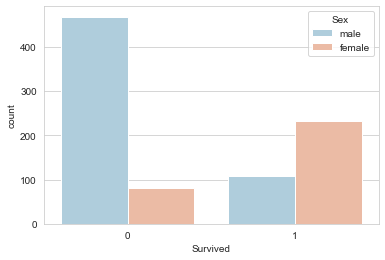

In [8]:
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

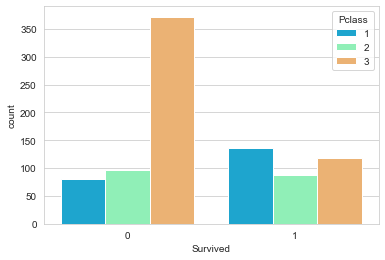

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

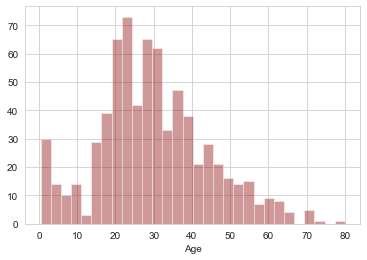

In [10]:
sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=30)

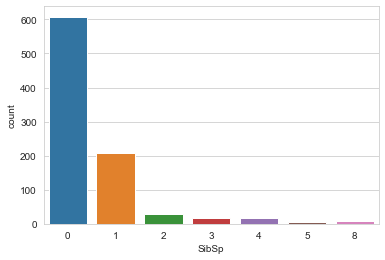

In [11]:
sns.countplot(x='SibSp',data=df)

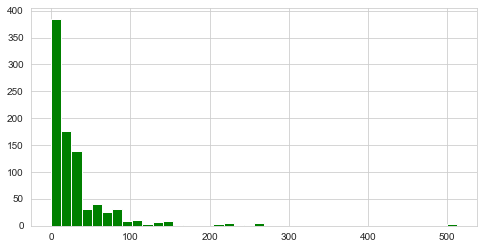

In [12]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

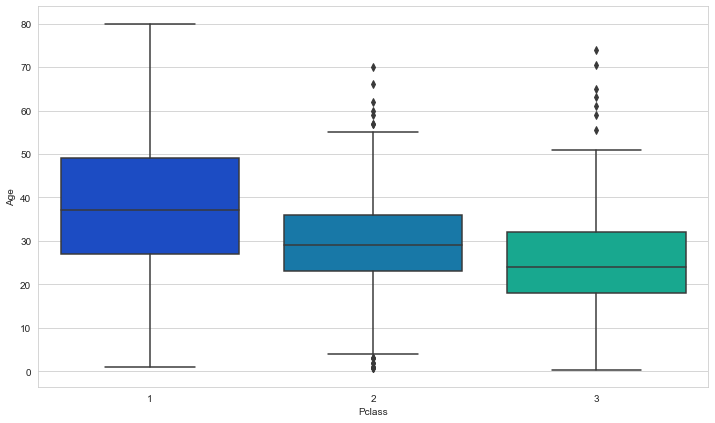

In [13]:
#Data Cleaning
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [14]:
#predicting age based on class
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [15]:
#Now apply that function!
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)
df_test['Age'] = df_test[['Age','Pclass']].apply(impute_age,axis=1)

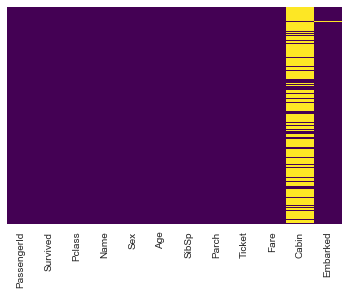

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
df.drop('Cabin',axis=1,inplace=True)
df_test.drop('Cabin',axis=1,inplace=True)

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
mode=df['Embarked'].mode()
mode_test=df_test['Embarked'].mode
df['Embarked'].fillna(mode, inplace=True)
df_test['Embarked'].fillna(mode_test, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [21]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.7+ KB


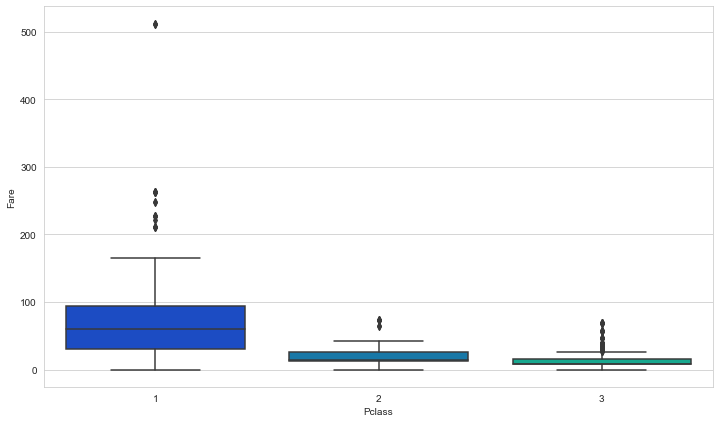

In [22]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Fare',data=df,palette='winter')

In [23]:
#predicting fare based on Pclass
def impute_fare(cols):
    Fare = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Fare):
        if Pclass == 1:
            return df[df['Pclass']==1]['Fare'].mean()
        elif Pclass == 2:
            return df[df['Pclass']==2]['Fare'].mean()
        else:
            return df[df['Pclass']==3]['Fare'].mean()
    else:
        return Fare

In [24]:
#Now apply that function!
df_test['Fare'] = df_test[['Fare','Pclass']].apply(impute_fare,axis=1)

In [25]:
sex = pd.get_dummies(df['Sex'], drop_first=True)
sex_test = pd.get_dummies(df_test['Sex'], drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)
embark_test = pd.get_dummies(df_test['Embarked'],drop_first=True)
df=pd.concat([df, sex, embark], axis=1)
df_test=pd.concat([df_test, sex_test, embark_test], axis=1)

In [26]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
df_test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [27]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
male           418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 20.9 KB


In [28]:
#Train Test Split
from sklearn.model_selection import train_test_split

In [29]:
X=df.drop(['Survived', 'PassengerId'], axis=1)
y=df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    random_state=101)

In [31]:
#Training & Prediction-First try Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=150)
rfc.fit(X_train, y_train)

#Evaluation
rfc_pred=rfc.predict(X_test)
print(classification_report(y_test, rfc_pred))
print("\n")
print(confusion_matrix(y_test, rfc_pred))
#f1score-0.81

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       154
           1       0.81      0.72      0.76       114

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



[[135  19]
 [ 32  82]]


In [30]:
#First try logistic regression
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train, y_train)

pred = logmodel.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred))
print('\n')
print(confusion_matrix(y_test, pred))
#f1-score. 0.78

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.78      0.65      0.71       114

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



[[133  21]
 [ 40  74]]


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [32]:
#Then try SVM models-part1
from sklearn.svm import SVC
model=SVC()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
print('\n')
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.67      0.86      0.75       154
           1       0.69      0.41      0.52       114

    accuracy                           0.67       268
   macro avg       0.68      0.64      0.63       268
weighted avg       0.68      0.67      0.65       268



[[133  21]
 [ 67  47]]


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [33]:
#SVM models-part2
#Gridsearch
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1, 1,100,1000], 'gamma': [1, 0.1,0.01,0.001,0.0001]}
grid=GridSearchCV(model, param_grid, verbose=3)


grid.fit(X_train, y_train)
grid_preds = grid.predict(X_test)


print(classification_report(y_test, grid_preds))
print('\n')
print(confusion_matrix(y_test, grid_preds))
#f1score:0.75

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.635, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.635, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.633, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.635, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.635, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.633, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........................ C=1, gamma=1, score=0.683, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.639, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.657, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.678, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.644, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.700, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.702, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.0s finished


In [34]:
Survived=rfc.predict(df_test.drop('PassengerId', axis=1))

In [35]:
predictions=pd.DataFrame(data=Survived, columns=['Survived'])
predictions

,Survived
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,0
8,1
9,0


In [36]:
PassengerId=pd.DataFrame(data=df_test['PassengerId'], columns=['PassengerId'])
predictions.set_index(PassengerId.index, inplace=True)
submission=pd.concat([PassengerId, predictions], axis=1)

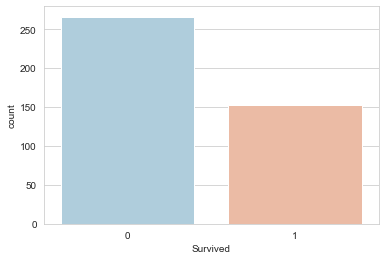

In [37]:
#Plot to see the prediction results
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=submission,palette='RdBu_r')

In [38]:
submission.to_csv('Titanic_Random_Forest.csv', index=False)

In [39]:
pd.read_csv('Titanic_Random_Forest.csv')

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
